In [498]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
from __future__ import print_function # use the print() function from Python3
from operator import add
from pylab import *
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
ms.use('seaborn-muted')         # fancy plot designs
import soundfile as sf
from numpy import random
from scipy import signal
import matplotlib.pyplot as plt
from statistics import mean 
import librosa
import scipy.io.wavfile as wavf

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [499]:
from tree_lib import *

In [500]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

In [501]:
df = pd.read_csv("all_features.csv")
df = df.drop(columns=['Unnamed: 0'])
df['rank'] = df['rating'].rank()
list(df.columns.values)

['expression',
 'rating',
 'tempo',
 'avg_cent',
 'std_cent',
 'avg_rolloff',
 'std_rolloff',
 'avg_zcross',
 'std_zcross',
 'avg_flt',
 'std_flt',
 'avg_bw',
 'avg_ctr',
 'std_ctr',
 'height',
 'leaves',
 't-count',
 'operators',
 '2_powers',
 'avg_operand',
 'std_operand',
 'rank']

In [502]:
df

,expression,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,...,avg_ctr,std_ctr,height,leaves,t-count,operators,2_powers,avg_operand,std_operand,rank
0,(t^(t|11))^((t*12)&11),0,0.000000,2397.742187,15.091598,3499.092151,18.751655,0.623013,0.018510,0.000018,...,69.718268,38.167484,3.0,3.0,3.0,5.0,0.0,11.0,0.0,54.0
1,t*(t/10),5,0.000000,1967.835677,139.002189,3359.908049,107.338253,0.498658,0.056105,0.405539,...,16.963792,2.828404,2.0,1.0,2.0,2.0,0.0,10.0,0.0,178.5
2,(t|(t&7))*(t/8),5,0.000000,1973.796906,123.739123,3380.505397,84.243555,0.498456,0.015501,0.297074,...,23.286908,5.089016,3.0,2.0,3.0,4.0,1.0,7.0,0.0,178.5
3,((t>>6)-(t^((t>>1)|5)))-((t>>4)&5),10,0.000000,1090.473150,82.708608,2546.341951,161.222079,0.030035,0.003914,0.064719,...,17.700608,5.406530,5.0,5.0,4.0,8.0,2.0,4.0,1.0,317.0
4,(t*((3+(1^((t>>10)&5)))*(5+(3&(t>>14)))))>>((t...,80,0.000000,1375.247172,125.774728,2883.745336,125.740284,0.127081,0.045806,0.094418,...,19.485216,3.035491,7.0,9.0,4.0,12.0,2.0,5.0,4.0,982.0
5,t>>((t^(t|11))*(((t|8)&(((t>>10)*(t&11))*10))>...,45,58.593750,1405.434159,318.545960,2943.813300,549.612072,0.210597,0.125716,0.014998,...,37.113671,25.308378,7.0,6.0,6.0,11.0,1.0,10.0,1.0,875.0
6,((t>>13)>>(t&(t&(t>>15))))|(t>>(t*(t>>12))),10,14.648438,142.246772,125.576124,64.690498,310.284654,0.000122,0.000870,0.000069,...,46.739396,34.808292,5.0,3.0,7.0,9.0,0.0,13.0,1.0,317.0
7,(t|9)>>((t&9)*7),10,14.648438,1643.016174,79.731008,3641.749400,70.769139,0.279184,0.031679,0.000308,...,71.984035,15.198755,3.0,3.0,2.0,4.0,0.0,8.0,1.0,317.0
8,t*(((t>>6)&12)|(((t>>12)&25)^(((t>>10)&12)&(t>...,90,15.120968,1442.582115,280.605665,2862.548308,287.227102,0.120822,0.062164,0.054682,...,52.876133,34.281462,6.0,7.0,5.0,11.0,0.0,13.0,6.0,993.0
9,(((t|5)*7)>>8)^((t*6)*11),5,17.045455,2069.834397,107.679454,3613.347881,138.731292,0.513928,0.015297,0.018100,...,22.660011,6.563790,4.0,5.0,2.0,6.0,1.0,7.0,2.0,178.5


In [503]:
def classif(col):
    if col['rating'] > 40:
        return 1
    else:
        return 0

In [504]:
import random
df['class'] = df.apply(classif, axis = 1)
mean = df['rating'].mean()
df['mean'] = [mean for i in range(len(df))]
df['random'] = [random.randint(0,100) for i in range(len(df))]
median = df['rating'].median()
mode = df['rating'].mode()
df['median'] = [median for i in range(len(df))]
df['mode1'] = [0 for i in range(len(df))]
df['mode2'] = [5 for i in range(len(df))]
df['rand_error'] = df['rating'] - df['random']
df['mean_error'] = df['rating'] - df['mean']
df['median_error'] = df['rating'] - df['median']
df['mode1_error'] = df['rating'] - df['mode1']
df['mode2_error'] = df['rating'] - df['mode2']

In [505]:
print(mode)

0    5
dtype: int64


In [506]:
from sklearn.model_selection import train_test_split
X = df[[
 'avg_cent',
 'std_cent',
 'avg_rolloff',
 'std_rolloff',
 'avg_zcross',
 'std_zcross',
 'avg_flt',
 'std_flt',
 'avg_bw',
 'avg_ctr',
 'std_ctr',
 'height',
 'leaves',
 't-count',
 'operators',
 '2_powers',
 'avg_operand',
 'std_operand']]


from sklearn.decomposition import PCA

scaler = preprocessing.StandardScaler()
scaler.fit_transform(X)

pca = PCA(n_components=3).fit(X)
X = pca.transform(X)


y = df[['class']].squeeze()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [507]:
X

array([[-1179.4310885 ,  -258.00890606,   668.4666236 ],
       [ -881.84207194,  -140.35831646,   250.91592797],
       [ -905.23510148,  -165.45840535,   243.69432016],
       ...,
       [ -929.82401017,  -149.29647855,   259.72498278],
       [  -20.7947094 ,  -313.68439035,  -216.65378864],
       [  473.39404008,     4.95393677,    44.95804608]])

In [508]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                 multi_class='multinomial').fit(X_train, y_train)

In [509]:
ytrain_pred = 100*clf.predict_proba(X_train)[:][:,1]
ytest_pred = 100*clf.predict_proba(X_test)[:][:,1]

MSE = mean_squared_error(y_train, ytrain_pred)
MSE2 = mean_squared_error(y_test, ytest_pred)
mean_MSE = mean_squared_error(y_test, df['mean'][0:200])
rand_MSE = mean_squared_error(y_test, df['random'][0:200])
median_MSE = mean_squared_error(y_test, df['median'][0:200])
mode1_MSE = mean_squared_error(y_test, df['mode1'][0:200])
mode2_MSE = mean_squared_error(y_test,df['mode2'][0:200])
print("training MSE: " + str(MSE))
print("testing MSE: " + str(MSE2))
print("mean MSE: " + str(mean_MSE))
print("rand MSE: " + str(rand_MSE))
print("median MSE: " + str(median_MSE))
print("mode1 MSE: " + str(mode1_MSE))
print("mode2 MSE: " + str(mode2_MSE))

training MSE: 258.7024141455619
testing MSE: 332.13272943123184
mean MSE: 493.574896
rand MSE: 3356.64
median MSE: 221.23
mode1 MSE: 0.13
mode2 MSE: 23.83


In [510]:
df['predicted'] = 100*clf.predict_proba(X)[:][:,1]



In [511]:
df.sort_values(by='predicted')

,expression,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,...,random,median,mode1,mode2,rand_error,mean_error,median_error,mode1_error,mode2_error,predicted
464,(((t&1)*1)-(t>>2))+((((t>>3)^1)^(t-(t-2)))*((t...,0,117.187500,1080.466883,60.752810,3340.143590,43.041467,0.009745,0.000275,0.006239,...,79,15.0,0,5,-79,-22.344,-15.0,0,-5,3.542762
810,(t&8)|((((t>>11)%8)&12)+((t&8)&10)),10,58.593750,963.463472,24.273254,2499.092151,3.111997,0.124212,0.003702,0.000120,...,30,15.0,0,5,-20,-12.344,-5.0,10,5,5.033083
897,t+((((t>>9)+((t>>10)|11))*(t*8))&9),5,187.500000,1395.232378,57.611043,3548.707356,45.206888,0.030950,0.000823,0.001577,...,28,15.0,0,5,-23,-17.344,-10.0,5,0,5.082120
171,(t-5)/(((t>>0)&0)|5),0,93.750000,616.068819,24.009117,1582.431037,66.933795,0.001560,0.000198,0.008523,...,75,15.0,0,5,-75,-22.344,-15.0,0,-5,5.216509
359,(t&(t&7))^((t>>5)*5),5,156.250000,590.751116,27.283841,1521.538513,75.921578,0.001155,0.000241,0.005625,...,81,15.0,0,5,-76,-17.344,-10.0,5,0,5.276356
998,(t>>((t&4)&(t&(t^3))))&(t-5),15,117.187500,1103.548822,23.703540,2865.821562,45.870550,0.066344,0.031159,0.012216,...,54,15.0,0,5,-39,-7.344,0.0,15,10,5.380205
195,(t/4)-(((t>>6)^8)>>6),0,117.187500,643.744575,34.703478,1655.775253,91.587674,0.001939,0.000105,0.009293,...,72,15.0,0,5,-72,-22.344,-15.0,0,-5,5.491914
796,(t^6)/(((t+5)*(t>>(t|(((t+(t>>6))>>7)^2))))|5),0,93.750000,614.242193,34.071408,1576.950626,97.784699,0.001460,0.000059,0.008450,...,93,15.0,0,5,-93,-22.344,-15.0,0,-5,5.533923
550,t/(((t*4)&(t&4))|5),0,93.750000,613.583141,37.582682,1575.976146,102.981326,0.001460,0.000059,0.008484,...,29,15.0,0,5,-29,-22.344,-15.0,0,-5,5.598654
790,t-(((t/5)*1)*4),0,93.750000,613.583141,37.582682,1575.976146,102.981326,0.001460,0.000059,0.008484,...,68,15.0,0,5,-68,-22.344,-15.0,0,-5,5.598727


In [512]:
df.describe()

,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,std_flt,...,random,median,mode1,mode2,rand_error,mean_error,median_error,mode1_error,mode2_error,predicted
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.0,1000.0,1000.0,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.344000,107.475174,1317.554964,194.716700,2734.677047,318.999859,0.187951,0.067569,0.035749,0.015463,...,49.508000,15.0,0.0,5.0,-27.16400,-2.943068e-14,7.344000,22.344000,17.344000,14.608836
std,19.782897,55.341289,454.115297,120.529533,701.538060,242.829092,0.173898,0.076038,0.068494,0.024824,...,29.042683,0.0,0.0,0.0,35.70549,1.978290e+01,19.782897,19.782897,19.782897,8.068019
min,0.000000,0.000000,81.947177,5.276370,64.690498,0.180181,0.000003,0.000000,0.000012,0.000068,...,0.000000,15.0,0.0,5.0,-100.00000,-2.234400e+01,-15.000000,0.000000,-5.000000,3.542762
25%,10.000000,58.593750,960.694942,106.153711,2265.791578,148.987617,0.025881,0.008543,0.002556,0.002614,...,24.000000,15.0,0.0,5.0,-54.25000,-1.234400e+01,-5.000000,10.000000,5.000000,9.119287
50%,15.000000,117.187500,1355.208617,163.167806,2923.303404,257.853018,0.133215,0.040105,0.009213,0.006057,...,49.500000,15.0,0.0,5.0,-27.00000,-7.344000e+00,0.000000,15.000000,10.000000,12.328453
75%,30.000000,117.187500,1670.299295,256.248571,3271.361523,432.398541,0.292770,0.104854,0.032037,0.015748,...,74.000000,15.0,0.0,5.0,-4.00000,7.656000e+00,15.000000,30.000000,25.000000,17.535046
max,100.000000,312.500000,3185.330203,833.474729,3999.383662,1454.644576,0.989808,0.476764,0.527401,0.227963,...,100.000000,15.0,0.0,5.0,79.00000,7.765600e+01,85.000000,100.000000,95.000000,66.512538


In [513]:
import pickle


In [514]:
filename = 'finalized_model.sav'
pickle.dump(clf, open("logistic.sav", 'wb'))

In [515]:
model_results = [[MSE,MSE2,267.81,360.41, 420, 353, 273, 347]]

In [516]:
results = pd.DataFrame(model_results, columns = ['log_train', 'log_test', 'SGD_train', 'SGD_test', 'SVR_train', 'SVR_test', 'NN_train', 'NN_test']) 

In [517]:
results


,log_train,log_test,SGD_train,SGD_test,SVR_train,SVR_test,NN_train,NN_test
0,258.702414,332.132729,267.81,360.41,420,353,273,347


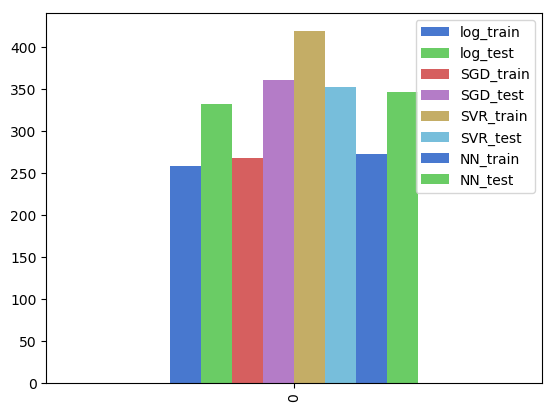

In [518]:
ax = results.plot.bar()

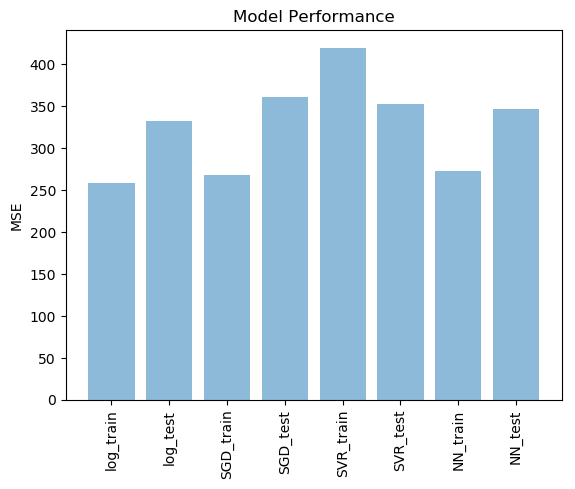

In [519]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

y_pos = ['log_train', 'log_test', 'SGD_train', 'SGD_test', 'SVR_train', 'SVR_test', 'NN_train', 'NN_test']
model_results = [MSE,MSE2,267.81,360.41, 420, 353, 273, 347]

plt.bar(y_pos, model_results, align='center', alpha=0.5)
plt.xticks(y_pos, y_pos, rotation='vertical')
plt.ylabel('MSE')
plt.title('Model Performance')
plt.show()


In [520]:
y_pos

['log_train',
 'log_test',
 'SGD_train',
 'SGD_test',
 'SVR_train',
 'SVR_test',
 'NN_train',
 'NN_test']

In [521]:
from statistics import mean
tests = [MSE2,360.41, 353, 347]
mean(tests)

348.135682357808

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


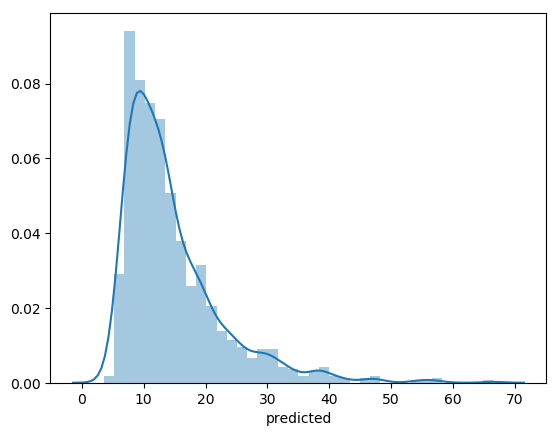

In [522]:
import seaborn as sns
x = df['predicted']
sns.distplot(x);

In [439]:
df['predicted'] = pd.Series(df['predicted']).apply(lambda x: custom_round(x, base=5))
df['rank'] = df['predicted'].rank()

In [440]:
df

,expression,rating,tempo,avg_cent,std_cent,avg_rolloff,std_rolloff,avg_zcross,std_zcross,avg_flt,...,mode2,rand_error,mean_error,median_error,mode1_error,mode2_error,predicted,error,ranking,rank
0,(t^(t|11))^((t*12)&11),0,0.000000,2397.742187,15.091598,3499.092151,18.751655,0.623013,0.018510,0.000018,...,5,-31,-22.344,-15.0,0,-5,25,-27.022720,25,894.5
1,t*(t/10),5,0.000000,1967.835677,139.002189,3359.908049,107.338253,0.498658,0.056105,0.405539,...,5,-19,-17.344,-10.0,5,0,15,-12.275343,15,629.0
2,(t|(t&7))*(t/8),5,0.000000,1973.796906,123.739123,3380.505397,84.243555,0.498456,0.015501,0.297074,...,5,-9,-17.344,-10.0,5,0,15,-11.466935,15,629.0
3,((t>>6)-(t^((t>>1)|5)))-((t>>4)&5),10,0.000000,1090.473150,82.708608,2546.341951,161.222079,0.030035,0.003914,0.064719,...,5,-54,-12.344,-5.0,10,5,10,2.318558,10,305.5
4,(t*((3+(1^((t>>10)&5)))*(5+(3&(t>>14)))))>>((t...,80,0.000000,1375.247172,125.774728,2883.745336,125.740284,0.127081,0.045806,0.094418,...,5,27,57.656,65.0,80,75,10,70.294219,10,305.5
5,t>>((t^(t|11))*(((t|8)&(((t>>10)*(t&11))*10))>...,45,58.593750,1405.434159,318.545960,2943.813300,549.612072,0.210597,0.125716,0.014998,...,5,25,22.656,30.0,45,40,20,24.570247,20,807.0
6,((t>>13)>>(t&(t&(t>>15))))|(t>>(t*(t>>12))),10,14.648438,142.246772,125.576124,64.690498,310.284654,0.000122,0.000870,0.000069,...,5,-22,-12.344,-5.0,10,5,10,-0.846086,10,305.5
7,(t|9)>>((t&9)*7),10,14.648438,1643.016174,79.731008,3641.749400,70.769139,0.279184,0.031679,0.000308,...,5,-82,-12.344,-5.0,10,5,5,2.902955,5,51.5
8,t*(((t>>6)&12)|(((t>>12)&25)^(((t>>10)&12)&(t>...,90,15.120968,1442.582115,280.605665,2862.548308,287.227102,0.120822,0.062164,0.054682,...,5,67,67.656,75.0,90,85,15,73.863474,15,629.0
9,(((t|5)*7)>>8)^((t*6)*11),5,17.045455,2069.834397,107.679454,3613.347881,138.731292,0.513928,0.015297,0.018100,...,5,-77,-17.344,-10.0,5,0,20,-13.395319,20,807.0
